# Neural Networks

The code written isn't going to be optimized, as it isn't the goal of this notebook. The purpose of this notebook is to present to you an intuitive and easy way to understand how Neural Networks, the backbone of Deep Learning works. 

Neural networks is a type of algorithm that uses previous learning methods to create relationships between features. The exact way and behavior of a neural network is still unknown, however we know that it can be used for a vast variety of problems. Image Recognition systems, voice recognition, translating and self-driving cars uses variations of Neural Networks to get the best output.

In this notebook, we will look into at the basic Neural Network. We will be explaining terminology, as well as the mathematics behind this mysterious and exciting algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patching
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection


%matplotlib inline

In [2]:
#Different layers in Neural Network
layers = [6,3,4,2]

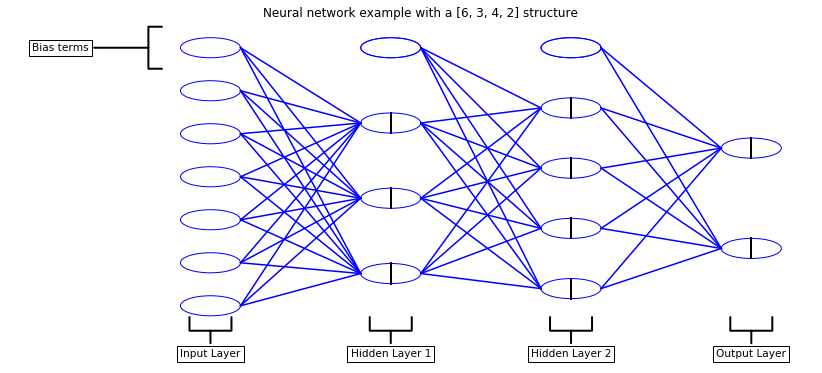

In [3]:
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))


for place in range(len(layers)):
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

Looks like a spider-web doesn't it? It's a little bit daunting at first, however in reality it is extremely simple to understand.

The first thing to understand is that Neural Networks work in two steps: forward propagation and back-propagation. Consider forward propagation as the predictive part of the algorithm, while the back-propagation as the adjustment part of the algorithm.

Before we dive into both parts, let's look at some nomenclature:


$ x_j $ represents the input at node j

$ a_j^i $ represents the input at the hidden layer i, node j.

$ z_j^i $ represents the transformation of $a_j^i$ (explain what the transformation is)

$ \theta_{jk}^i$ represents the weight value for node k in the previous layer, for the node j in the layer i

Forward propagation is essentially filling each node with numbers. The way to do this is just like in logistic regression. In order to calculate a node k in a hidden layer i, we need to multiply each node of the previous layer by a weight.

You might have noticed that there is an additional node for every layer except the output. This special node is called Bias, and it has a value of 1. The Bias is used for the algorithm to learn faster and more efficiently.


## Part 1: Feed Forward


Let's create a random input and a random output. We will add the bias term 1 to the input. The output will be a matrix combination of 0s and 1s.

In [4]:
#Create an array of all values
allvalues = {}

#Create a dictionnary of all weights
allweights = {}

In [5]:
Input = np.random.randint(10, size = (layers[0]))
Input = np.append(1,Input)
allvalues['z0'] = Input
Output = np.random.randint(2, size=(layers[-1]))
Input, Output

(array([1, 4, 2, 2, 0, 2, 1]), array([0, 0]))

Now that we have our inputs, let's add them to our graph.

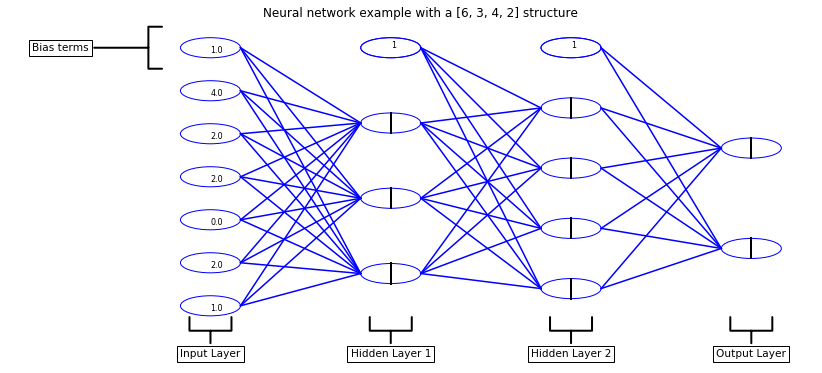

In [6]:
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

Ndecimals = 2
decade = 10**Ndecimals

for place in range(len(layers)):
    addindex = True
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            if n == 0 and place != 0:
                plt.text(x1*2+xspace*(place+1), y1, '1', fontsize=8);
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
            if place == 0:
                plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z0'][n]*decade)/decade),2), fontsize=8);
                        
            if 'a{}'.format(place) in allvalues.keys():
                if len(allvalues['a{}'.format(place)]) != nlayer:
                    #Rounding for it to fit in the graph
                    plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n]*decade)/decade),2), fontsize=8);

                else:
                    plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                    #Temporary code, since allvalues isn't populated yet.
                    if 'z{}'.format(place) in allvalues.keys():
                        plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][(n+1)%(nlayer+1)]*decade)/decade),2), fontsize=8);
            
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);     
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:   
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

Alright! Now that we are here, we need to calculate the nodes for the hiden layer. We will first need to create a positive weight matrix. This matrix will be a randomly created, but needs to have dimensions (nodes x Inputs). Recall that the Inputs includes bias.

After we create the matrix, we find $a^1$ by cross-multiplying each vector.

At the same time, we will store the weights in a dictionnary

In [7]:
weights1 = np.random.rand(layers[0]+1, layers[1])
allweights['1'] = weights1
a1 = np.dot(Input, weights1)
allvalues['a1'] = a1
print(a1)

[7.08552447 7.60603144 5.68785508]


Let's populate our graph

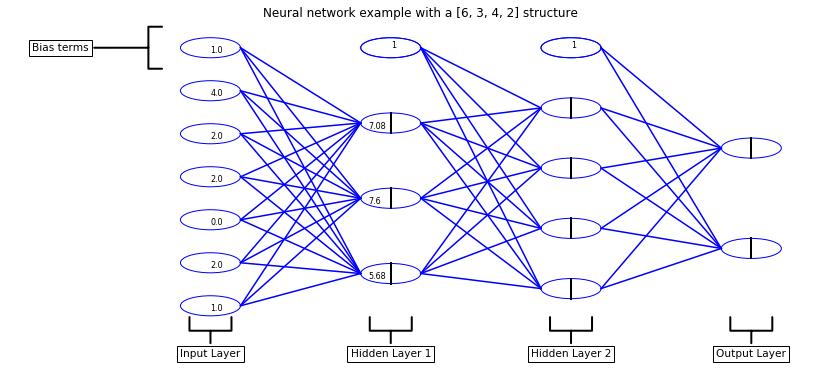

In [8]:
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

Ndecimals = 2
decade = 10**Ndecimals

for place in range(len(layers)):
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            if n == 0 and place != 0:
                plt.text(x1*2+xspace*(place+1), y1, '1', fontsize=8);
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
            if place == 0:
                plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z0'][n]*decade)/decade),2), fontsize=8);            
           
            if 'a{}'.format(place) in allvalues.keys():
                if len(allvalues['a{}'.format(place)]) != nlayer:
                    #Rounding for it to fit in the graph
                    plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n]*decade)/decade),2), fontsize=8);

                else:
                    plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                    #Temporary code, since allvalues isn't populated yet.
                    if 'z{}'.format(place) in allvalues.keys():
                        plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][(n+1)%(nlayer+1)]*decade)/decade),2), fontsize=8);
            
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);     
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:   
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

Alright! Now, we need to transform it. This transformation is done by using a logistic function. Let's use the most traditional one: the sigmoid function.

We will need to define a sigmoid function. However, we don't need a threshold here. The threshold is only used for the end when predicting.

Therefore, our transformation $z^i$ will be:
$$ z^i = \sigma(a^i) $$

We will also need to add the bias term.

In [9]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

z1 = sigmoid(a1)
z1 = np.append(1, z1)
allvalues['z1'] = z1
print(z1)

[1.         0.99916356 0.99950281 0.99662458]


Let's populate the graph again

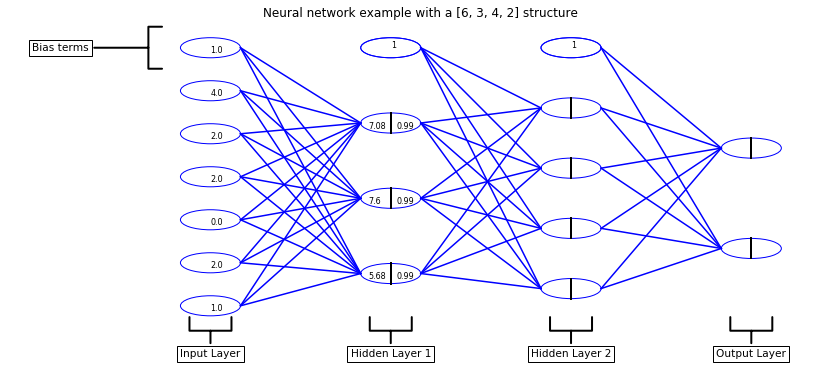

In [10]:
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

Ndecimals = 2
decade = 10**Ndecimals

for place in range(len(layers)):
    addindex = True
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            if n == 0 and place != 0:
                plt.text(x1*2+xspace*(place+1), y1, '1', fontsize=8);
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
            if place == 0:
                plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z0'][n]*decade)/decade),2), fontsize=8);
            if 'a{}'.format(place) in allvalues.keys():
                if len(allvalues['a{}'.format(place)]) != nlayer:
                    #Rounding for it to fit in the graph
                    plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n]*decade)/decade),2), fontsize=8);

                else:
                    plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                    #Temporary code, since allvalues isn't populated yet.
                    if 'z{}'.format(place) in allvalues.keys():
                        plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][(n+1)%(nlayer+1)]*decade)/decade),2), fontsize=8);
            
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);
            if 'a{}'.format(place) in allvalues.keys():
                plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                        
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:   
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

Now, we need to repeat the process until we arrive to the output layer.

In [11]:
for indec in range(len(layers[2:])):
    weight = np.random.rand(layers[indec+1]+1, layers[2:][indec], )
    allweights[indec+2] = weight
    inter = allvalues['z{}'.format(indec+1)]
    a1 = np.dot(inter, weight)
    
    allvalues['a{}'.format(indec+2)] = a1
    z1 = sigmoid(a1)
    if indec != len(layers[2:])-1:
        z1 = np.append(1, z1)
    allvalues['z{}'.format(indec+2)] = z1

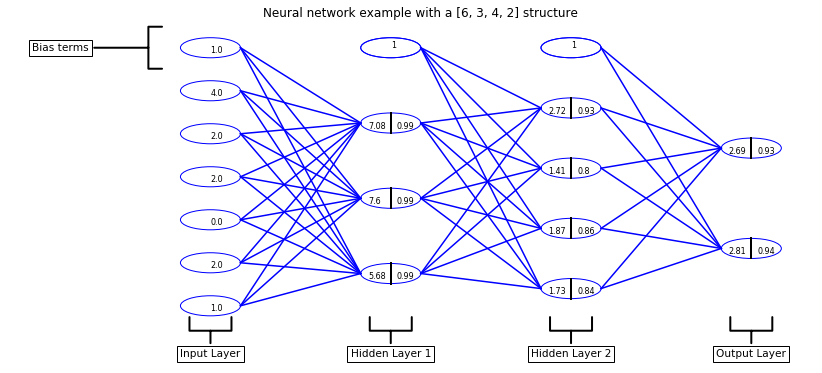

In [12]:
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

Ndecimals = 2
decade = 10**Ndecimals

for place in range(len(layers)):
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            if n == 0 and place != 0:
                plt.text(x1*2+xspace*(place+1), y1, '1', fontsize=8);
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
            if place == 0:
                plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z0'][n]*decade)/decade),2), fontsize=8);
            if 'a{}'.format(place) in allvalues.keys():
                if len(allvalues['a{}'.format(place)]) != nlayer:
                    #Rounding for it to fit in the graph
                    plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n]*decade)/decade),2), fontsize=8);

                else:
                    plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                    #Temporary code, since allvalues isn't populated yet.
                    if 'z{}'.format(place) in allvalues.keys():
                        plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][(n+1)%(nlayer+1)]*decade)/decade),2), fontsize=8);
            
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);
            if 'a{}'.format(place) in allvalues.keys():
                plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                        
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:   
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

The algorithm we created so far is called Feed Forward propagation. It is the first part of the algorithm. In reality, this algorithm is just a few lines long:

In [13]:
#Create an array of all values
allvalues = {}

#Create a dictionnary of all weights
allweights = {}

#Input values
Input = np.matrix(np.random.randint(10, size = layers[0])).reshape(1,layers[0])
Input = np.append(1,Input)
allvalues['z0'] = Input

#Output values
Output = np.random.randint(layers[-1], size=(layers[-1]))

#Computing through the hidden layers and output
for indec in range(len(layers)-1):
    #Create the weight matrix
    weight = np.random.rand(layers[indec]+1, layers[indec+1])
    #Add weight matrix to dictionnary
    allweights[indec] = weight
    inter = allvalues['z{}'.format(indec)]
    #Dot product
    a1 = np.dot(inter, weight)

    #Store a into dictionnary
    allvalues['a{}'.format(indec+1)] = a1

    #Store transformation in ditionnary
    z1 = sigmoid(a1)
    if indec < len(layers)-2:
        z1 = np.append(1, z1)
    allvalues['z{}'.format(indec+1)] = z1

In [14]:
allvalues, allweights

({'a1': array([15.92091344,  8.17909746, 15.69748629]),
  'a2': array([2.39290635, 2.79132635, 2.60536598, 2.20767418]),
  'a3': array([2.89439296, 0.64650614]),
  'z0': array([1, 2, 6, 9, 9, 2, 1]),
  'z1': array([1.        , 0.99999988, 0.99971962, 0.99999985]),
  'z2': array([1.        , 0.91628478, 0.94220531, 0.93120613, 0.90093654]),
  'z3': array([0.94756856, 0.6562227 ])},
 {0: array([[0.70093959, 0.18995471, 0.25761465],
         [0.44739556, 0.18249221, 0.38060309],
         [0.72663565, 0.03906487, 0.75343367],
         [0.52883247, 0.39077908, 0.65602461],
         [0.42823715, 0.15794729, 0.24210722],
         [0.62173803, 0.94796116, 0.70835137],
         [0.10826625, 0.55530947, 0.6581743 ]]),
  1: array([[0.76567922, 0.28233913, 0.87137098, 0.66869721],
         [0.39499605, 0.83812903, 0.9490114 , 0.38012561],
         [0.8894021 , 0.67636138, 0.0886967 , 0.92656943],
         [0.34307845, 0.9946867 , 0.69631199, 0.2325418 ]]),
  2: array([[0.63128248, 0.11731397],
   

## Part 2: Back propagation

In the first part, we looked at the feed forward section of the Neural Network. The second part, we will look at the backpropagation algorithms.

Back propagation is the adjustment of the weights. By doing this, we can adjust each weight, and have a better prediction. To start with back-propagation, we must first compute the loss. For this example, we will take a simple mean-squared error.

$$ Loss(y,P) = \frac{1}{2}*(y-P)^2$$

In [15]:
loss = 1/2*(allvalues['z{}'.format(len(layers)-1)] - Output)**2
print(loss)

[0.00137453 0.05909142]


Notice that the loss is in function of y, the algorithm's prediction. This one, in turn, is dependant of every weights. These are the weights that we need to adjust. For this, we need to apply chain rule to calculate the partial derivates of the Loss for each weight. Let's do this step-by-step.

$$ Loss(y,P) = \frac{1}{2}*(y-P)^2$$
$$ \frac{\partial}{\partial y} Loss(y,P) = \frac{\partial}{\partial y} \frac{1}{2}*(y-P)^2$$
$$ \leftrightarrow \frac{\partial}{\partial y} Loss(y,P) = (y-P) $$

In [16]:
dLdy = allvalues['z{}'.format(len(layers)-1)] - Output
print(dLdy)

[-0.05243144 -0.3437773 ]


The next step now is to overcome the transformation. For this, we need to calculate the partial derivative of y with respect to $a_i^3$.

$$ \frac{\partial}{\partial a_i^3} y = \frac{\partial}{\partial a_i^3} \sigma(a_i^3)$$
$$ \leftrightarrow \frac{\partial}{\partial a_i^3} y = \sigma(a_i^3)*(1-\sigma(a_i^3))$$

In [17]:
dyda3 = sigmoid(allvalues['a{}'.format(len(layers)-1)])*(1-sigmoid(allvalues['a{}'.format(len(layers)-1)]))
print(dyda3)

[0.04968238 0.22559447]


Next, we will need to calculate the partial derivative $a_3$ with respect to every weight. Recall that:

$$ a_i^3 = \sum_{i=0}^m \theta_{2i}^3*z_i^2$$
$$ \leftrightarrow \frac{\partial}{\partial \theta_{ji}^3} a_i^3 = \frac{\partial}{\partial \theta_{ji}^3} \sum_{j=0}^k \sum_{i=0}^m \theta_{ji}^3*z_i^2$$
$$ \leftrightarrow \frac{\partial}{\partial \theta_{ji}^3} a_i^3 = z_i^2$$

What does this mean? This means that the partial derivative of each weight is equal to it's corresponding z value. If we think about it, it makes sense, as the weight is only associated with only 1 z value.

In [18]:
zs = allvalues['z{}'.format(len(layers)-2)]
da3dt2 = np.tile(zs,(2,1))

print(da3dt2)

[[1.         0.91628478 0.94220531 0.93120613 0.90093654]
 [1.         0.91628478 0.94220531 0.93120613 0.90093654]]


Now that we have found a partial derivated of the function, we can combine all of the previous ones to find the partial derivative of the loss in function of the weight matrix. We can find this by using ChainRule.

$$ \frac{\partial}{\partial \theta_{2i}} Loss(y,P)$$
$$ \leftrightarrow \frac{\partial a_i^3}{\partial \theta_{2i}} \frac{\partial}{\partial a_i^3} Loss(y,P)$$
$$ \leftrightarrow \frac{\partial a_i^3}{\partial \theta_{2i}} \frac{\partial y}{\partial a_i^3} \frac{\partial}{\partial y}Loss(y,P)$$

We know each of the different components! We just need to multiply and we get the adjustment matrix

In [19]:
weightadjustment = {}
intermediate = dLdy * dyda3
print(intermediate)
print(da3dt2[0])
matrix = []
for n in range(da3dt2.shape[0]):
    matrix.append(np.dot(intermediate[n],da3dt2[n]))

weightadjustment[2] = np.array(matrix)

print(weightadjustment)

[-0.00260492 -0.07755426]
[1.         0.91628478 0.94220531 0.93120613 0.90093654]
{2: array([[-0.00260492, -0.00238685, -0.00245437, -0.00242572, -0.00234687],
       [-0.07755426, -0.07106179, -0.07307203, -0.072219  , -0.06987146]])}


All right! We have finally created an adjustment matrix! Now, let's pass on to the next weight matrix. For this one, we need to find $\frac{\partial}{\partial z_i^2} a_i^3$. The main difference here is that we will need to drop the bias term.

$$ a_i^3 = \sum_{i=0}^m \theta_{2i}^3*z_i^2$$
$$ \leftrightarrow \frac{\partial}{\partial z_i^2} a_i^3 = \frac{\partial}{\partial z_i^2} \sum_{i=0}^m \theta_{2i}^3*z_i^2$$
$$ \leftrightarrow \frac{\partial}{\partial z_i^2} a_i^3 = \sum_{i=0}^m \theta_{2i}^3$$

In [20]:
da3dz2 = allweights[2][1:]
print(da3dz2)

[[0.52445328 0.39123016]
 [0.60609799 0.04035211]
 [0.72111646 0.133442  ]
 [0.59935976 0.0093591 ]]


Now, every theta corresponds to a node in the following layer. Therefore, we need to do a dot product between this matrix and the cumulative multiplication (partial derivatives) to continue our backprop.

In [21]:
np.dot(da3dz2,intermediate.reshape(intermediate.shape[0],1))

array([[-0.03170772],
       [-0.00470831],
       [-0.01222744],
       [-0.00228712]])

Now, the following step would be to calculate the partial derivative for a transformation. Isn't this something we encountered before? Yes, with the Output. When we look more closely, this patter of Output -> Transformation -> Weight will repeat until we get to the Input. This means that we can create a for loop to create an adjustment matrix.

The main difference here is that we will have a cumulative multiplication that we would need to track (all the partial derivatives until a certain point).

In [22]:
weightadjustment = {}
intermediate = allvalues['z{}'.format(len(layers)-1)] - Output
multiplication = 1
for n in range(1,len(layers)):
    #After transformation
    pas = allvalues['a{}'.format(len(layers)-n)]
    
    #Before transformation
    dyda3 = sigmoid(pas)*(1-sigmoid(pas))
    intermediate *= dyda3
    #Error in function of theta
    zs = allvalues['z{}'.format(len(layers)-(n+1))]
    da3dt2 = np.tile(zs,(layers[4-n],1))
    matrix = []
    
    #Creating adjustment matrix
    for m in range(da3dt2.shape[0]):
        matrix.append(np.dot(intermediate[m],da3dt2[m]))
    weightadjustment[3-n] = np.array(matrix).T
    
    #Calculating dzda3 and storing it in intermediate
    weighting = allweights[3-n]
    intermediate = np.dot(weighting[1:],intermediate.reshape(intermediate.shape[0],1))
    intermediate = intermediate.flatten()

In [23]:
weightadjustment

{0: array([[-2.43173786e-10, -7.27437441e-07, -2.56204106e-10],
        [-4.86347572e-10, -1.45487488e-06, -5.12408212e-10],
        [-1.45904272e-09, -4.36462465e-06, -1.53722464e-09],
        [-2.18856407e-09, -6.54693697e-06, -2.30583695e-09],
        [-2.18856407e-09, -6.54693697e-06, -2.30583695e-09],
        [-4.86347572e-10, -1.45487488e-06, -5.12408212e-10],
        [-2.43173786e-10, -7.27437441e-07, -2.56204106e-10]]),
 1: array([[-0.0024322 , -0.00025639, -0.00078331, -0.00020413],
        [-0.0024322 , -0.00025639, -0.00078331, -0.00020413],
        [-0.00243152, -0.00025632, -0.00078309, -0.00020407],
        [-0.0024322 , -0.00025639, -0.00078331, -0.00020413]]),
 2: array([[-0.00260492, -0.07755426],
        [-0.00238685, -0.07106179],
        [-0.00245437, -0.07307203],
        [-0.00242572, -0.072219  ],
        [-0.00234687, -0.06987146]])}

Now that we have the weight adjustment, we only need to update our weights with its corresponding adjustment Recall that we need to use a learning rate $\alpha$. Therefore:

$$ \theta^i = \theta^i - \alpha * \Delta \theta^i$$

In [24]:
alpha = 0.01
for n in range(len(layers)-1):
    allweights[n] -= alpha*weightadjustment[n]

And we have created our own backprop algorithm!

# Part 3: Combining algorithms

The full agorithm looks like this

In [26]:
def forwardpropagation(Input, layers, allweights):
    #Create an array of all values
    allvalues = {}

    #Input values
    allvalues['z0'] = Input
    for indec in range(len(layers)-1):
    #Computing through the hidden layers and output
        weight = allweights[indec] 
        inter = allvalues['z{}'.format(indec)]
        #Dot product
        a1 = np.dot(inter, weight)

        #Store a into dictionnary
        allvalues['a{}'.format(indec+1)] = a1

        #Store transformation in ditionnary
        z1 = sigmoid(a1)
        if indec < len(layers)-2:
            z1 = np.append(1, z1)
        allvalues['z{}'.format(indec+1)] = z1

    return allvalues

def backpropagation(allvalues, allweights, layers, alpha, final):
    weightadjustment = {}
    intermediate = allvalues['z{}'.format(len(layers)-1)] - final
    multiplication = 1
    for n in range(1,len(layers)):
        #After transformation
        pas = allvalues['a{}'.format(len(layers)-n)]

        #Before transformation
        dyda3 = sigmoid(pas)*(1-sigmoid(pas))
        intermediate *= dyda3
        #Error in function of theta
        zs = allvalues['z{}'.format(len(layers)-(n+1))]
        da3dt2 = np.tile(zs,(layers[len(layers)-n],1))
        matrix = []

        #Creating adjustment matrix
        for m in range(da3dt2.shape[0]):
            matrix.append(np.dot(intermediate[m],da3dt2[m]))
        weightadjustment[len(list(allweights.keys()))-n] = np.array(matrix).T

        #Calculating dzda3 and storing it in intermediate
        weighting = allweights[len(list(allweights.keys()))-n]
        intermediate = np.dot(weighting[1:],intermediate.reshape(intermediate.shape[0],1))
        intermediate = intermediate.flatten()
    
    for n in range(len(layers)-1):
        allweights[n] -= alpha*weightadjustment[n]
        
    return allweights
    
def Neuralnetwork(Input, Output, layers, alpha=0.01):
    #Create a dictionnary of all weights
    theta = {}
    for indec in range(len(layers)-1):
        #Create the weight matrix
        weight = np.random.rand(layers[indec]+1, layers[indec+1])
        #Add weight matrix to dictionnary
        theta[indec] = weight

    prediction = forwardpropagation(Input, layers, theta)
    weights = backpropagation(prediction, theta,layers, alpha, Output)
    return weights


layers = [6,3,4,4,2]

#Input values
Input = np.matrix(np.random.randint(10, size = layers[0])).reshape(1,layers[0])
Input = np.append(1,Input)

#Output values
Output = np.random.randint(layers[-1], size=(layers[-1]))

Neuralnetwork(Input, Output, layers, alpha=0.01)

{0: array([[0.60746444, 0.42057281, 0.58288892],
        [0.13596948, 0.1266758 , 0.66536916],
        [0.12307826, 0.51416541, 0.85228821],
        [0.90883866, 0.79626485, 0.68961173],
        [0.53010918, 0.86604009, 0.41152865],
        [0.17778639, 0.32001082, 0.13767859],
        [0.24595723, 0.80128816, 0.24922745]]),
 1: array([[0.36207924, 0.90007618, 0.82131998, 0.36711498],
        [0.74718776, 0.07274102, 0.97466768, 0.45062206],
        [0.51808612, 0.520342  , 0.2409868 , 0.21159414],
        [0.07302391, 0.45643404, 0.37561574, 0.04718667]]),
 2: array([[0.83832912, 0.34394735, 0.32737484, 0.79106883],
        [0.35645927, 0.07405209, 0.74449593, 0.7761095 ],
        [0.18759127, 0.76457186, 0.08937391, 0.01738375],
        [0.42207186, 0.23279763, 0.69029195, 0.4231197 ],
        [0.15937558, 0.25432504, 0.92047264, 0.56988122]]),
 3: array([[0.82650896, 0.66790735],
        [0.25910732, 0.3937207 ],
        [0.82309932, 0.26366005],
        [0.50836369, 0.20087276],
  

In [32]:
print(allvalues)

{'z0': array([1, 5, 4, 8, 7, 7, 0]), 'a1': array([ 8.5110951 , 14.31054261, 20.72423189]), 'z1': array([1.        , 0.99979882, 0.99999939, 1.        ]), 'a2': array([2.61531354, 1.69805666, 1.94317916, 1.27018009]), 'z2': array([1.        , 0.93184065, 0.84528075, 0.87470099, 0.78077357]), 'a3': array([2.16368217, 1.91618564, 1.66934361, 1.55048427]), 'z3': array([1.        , 0.89694042, 0.87171248, 0.84148829, 0.82498366]), 'a4': array([1.55497313, 2.13774601]), 'z4': array([0.82563085, 0.89451812])}


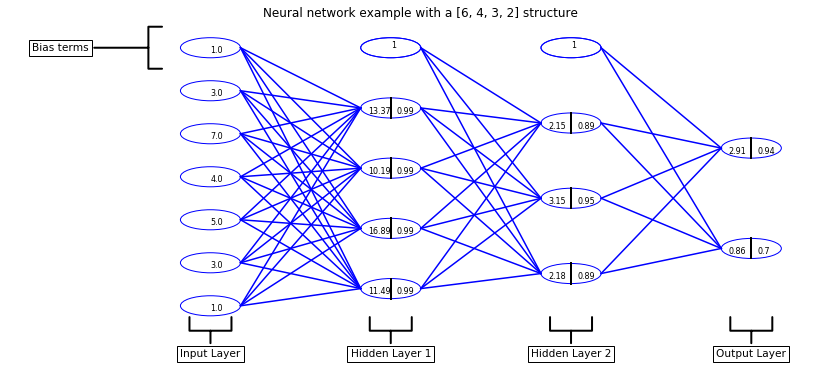

In [40]:
layers = [6,4,3,2]

#Input values
Input = np.matrix(np.random.randint(10, size = layers[0])).reshape(1,layers[0])
Input = np.append(1,Input)

#Create a dictionnary of all weights
theta = {}
for indec in range(len(layers)-1):
    #Create the weight matrix
    weight = np.random.rand(layers[indec]+1, layers[indec+1])
    #Add weight matrix to dictionnary
    theta[indec] = weight

#Output values
Output = np.random.randint(layers[-1], size=(layers[-1]))

allvalues = forwardpropagation(Input, layers, theta)
fig, ax = plt.subplots(figsize=(14,6))

# Keeping Circles, circle radius
patches = []
r = 0.1

#Plot start
x1 = 0
y1 = 3

#Neural Network layers
maxim = max(layers)
layername = ['Input']

#Distance in x and y (for largest layer)
xspace = 0.6
yspace = 0.2

fs = 7

ax.annotate('Bias terms', xy=(x1+0.4, y1), xytext=(x1+0.1, y1-0.05), xycoords='data', 
                fontsize=fs*1.5, ha='center', va='bottom',
                bbox=dict(boxstyle='square', fc='white'),
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

Ndecimals = 2
decade = 10**Ndecimals

for place in range(len(layers)):
    nlayer = layers[place]
    if place != len(layers)-1:
        for n in range(nlayer+1):
            if n == 0 and place != 0:
                plt.text(x1*2+xspace*(place+1), y1, '1', fontsize=8);
            circle = Circle((x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1), r);
            patches.append(circle);
            if place == 0:
                plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z0'][n]*decade)/decade),2), fontsize=8);
            if 'a{}'.format(place) in allvalues.keys():
                if len(allvalues['a{}'.format(place)]) != nlayer:
                    #Rounding for it to fit in the graph
                    plt.text(x1*2+xspace*(place+1), y1 - (n)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n]*decade)/decade),2), fontsize=8);

                else:
                    plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                    #Temporary code, since allvalues isn't populated yet.
                    if 'z{}'.format(place) in allvalues.keys():
                        plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][(n+1)%(nlayer+1)]*decade)/decade),2), fontsize=8);
            
    else:
        for n in range(nlayer):
            circle = Circle((x1*2+xspace*(place+1), y1 - (n+1)/(nlayer+1)*y1), r);
            patches.append(circle);
            if 'a{}'.format(place) in allvalues.keys():
                plt.text(x1*2+xspace*(place+1)-0.075, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['a{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                plt.text(x1*2+xspace*(place+1)+0.02, y1 - (n+1)/(nlayer+1)*y1 - 0.05, '{}'.format(np.float(np.trunc(allvalues['z{}'.format(place)][n%nlayer]*decade)/decade),2), fontsize=8);
                        
    if place != 0:
        if place != len(layers)-1:
            circle = Circle((x1*2+xspace*(place+1), y1), r);
            patches.append(circle);
            ax.annotate('Hidden Layer {}'.format(place), xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        else:
            ax.annotate('Output Layer' , xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))
        
        for m in range(layers[place-1]+1):
            for ny in range(nlayer):
                #Node to other
                ax.plot([x1*2+xspace*(place)+r, x1*2+xspace*(place+1)-r],\
                        [y1 - (m)/(layers[place-1]+1)*y1, y1 - (ny+1)/(nlayer+1)*y1], color = 'b')
                
                #Transform
                ax.plot([x1*2+xspace*(place+1), x1*2+xspace*(place+1)],\
                        [y1 - (ny+1)/(nlayer+1)*y1+r, y1 - (ny+1)/(nlayer+1)*y1-r], color = 'k')
    else:   
        ax.annotate('Input Layer', xy=((x1*2+xspace*(place+1), 0.2)),\
                xytext=(x1*2+xspace*(place+1), -0.1), xycoords='data', fontsize=fs*1.5,\
                ha='center', va='bottom', bbox=dict(boxstyle='square', fc='white'),\
                arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=1.3', lw=2.0))

p = PatchCollection(patches, alpha=1, color = 'None', edgecolor = 'b');
ax.add_collection(p);

#Person's name
ax.set_xlim(xmin = 0, xmax = x1*2+xspace*(place+1)+2*r);
ax.set_ylim(ymin = 0, ymax = y1+0.25);


ax.set_title('Neural network example with a {} structure'.format(layers))
plt.axis('off');
plt.show();

And that is the Neural Network algorithm! It is a simple algorithm, as it only accepts 1 input per time. We can expand this algorithm to accomodate more than 1 input. At the same time, we can also run this algorithm n number of times over all of our input. This reiteration of the calculations is also known an Epoch.

Another thing we can add are error handling, choose sigmoid functions, loss graph... And many more. Doing this will require us to use another kind of object, class, as it gets more complicated from there.

If we wanted to predict the outcome of a set of attributes, we would run the forward-propagation function with its corresponding inputs.

Neural Networks are an extremely intriguing and very useful tool to understand. It is extremely simple to understand mathematically, and the intuitions around it. Neural Networks have evolved into different groups that serve their own purposes, but they all rely on this same baseline.

I challenge you to think about how you can optimize this algorithm. Neural Networks are evolving, and there is a lot of techniques available to make them more efficient. I will cover some of the in other notebooks. Thank you very much for following! I wish you the best in your quest towards becoming Machine Learning Expert!